# Linera Regression

Suppose we have the data storage in file 'datas.csv'.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# magic 
%matplotlib inline
# end

# read data
# datas = pd.read_csv('Dataset/datas.csv', header=None).as_matrix()
datas = pd.read_csv('Dataset/MetroAreas.CSV').as_matrix()

# Population,Income ,Cost-of-Living Index
X, y = datas[:,1:3], datas[:,3]
X = X.astype(np.float64)
y = y.astype(np.float64)
m = X.shape[0]
y.shape = (m,1)
print("X shape: ", X.shape)
print("y shape: ", y.shape)

X shape:  (50, 2)
y shape:  (50, 1)


## Normalize

Notice that the X and y are too big to train the model. So we need to normalize them using

$$||X|| = \dfrac{X - \bar{X}}{max(X) - min(X)}$$

In [2]:
# Normalize
X = (X - np.mean(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
y = (y - np.mean(y, axis=0)) / (np.max(y, axis=0) - np.min(y, axis=0))

## Display the data in a plot

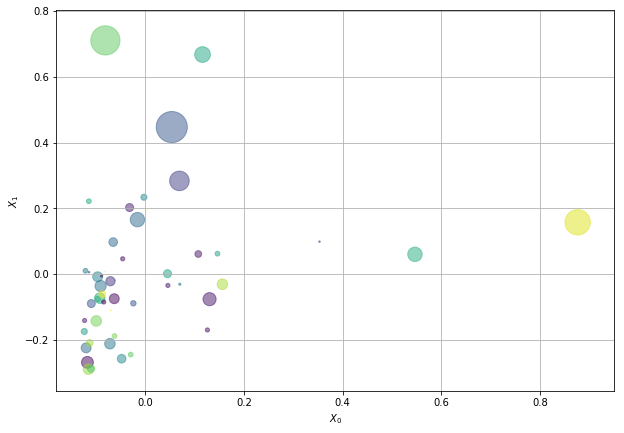

In [3]:
plt.figure(figsize=(10,7))
colors = np.random.rand(y.size)
area = np.pi * (25 * y )**2 # 0 to 25 point radii
plt.scatter(X[:,0], X[:,1], s=area, c=colors, alpha=0.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.grid()
plt.show()

## Create a model

All the red crosses looks in a line. Therefore we try to draw a line that can fit the crosses well.
Suppose we have the weights $w$ and the bias $b$, and the input is $X$, output $y$. Then we get a line $ Xw + b = y_{out}$.
The headache is how to choose the $w$ and $b$?

## What kind of line do we want to get

- There isn't a straight line taht can walk throuth all red crosses.
- How about the distance between red crosses and the line?
- Can we draw a line that has the minimum sum of distances.

We need to find a function that can calculate the distances. This kind of function are loss function(cost function).

We define the L1 loss as
$$ J = \dfrac{1}{m}  \sum\limits_{i=1}^{m}|y_i - l_i| $$

The L2 loss is 
$$ J = \dfrac{1}{m} \sum\limits_{i=1}^{m}(y_i - l_i)^2  $$

Where $l$ is a vector of labels, and $y$ is a vector of output.


## Gradent of L2

We have L2 and the gradent of L2 is

$$\dfrac{d J}{d y_i} = \dfrac{2}{m}(y_i - l_i)$$

## Gredent check

We have the L2 loss. We can use 

$$\dfrac{df(x)}{dx} = \lim\limits_{\Delta x \rightarrow 0}\dfrac{f(x + \Delta x) - f(x - \Delta x)}{2 \Delta x}$$

to chack whether our gradent is 


In [3]:
def eval_numerical_gradient(f, x, verbose=True, h=0.00001):
    """
    a naive implementation of numerical gradient of f at x
    - f should be a function that takes a single argument
    - x is the point (numpy array) to evaluate the gradient at
    """

    fx = f(x) # evaluate function value at original point
    grad = np.zeros_like(x)
    # iterate over all indexes in x
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:

        # evaluate function at x+h
        ix = it.multi_index
        oldval = x[ix]
        x[ix] = oldval + h # increment by h
        fxph = f(x) # evalute f(x + h)
        x[ix] = oldval - h
        fxmh = f(x) # evaluate f(x - h)
        x[ix] = oldval # restore

        # compute the partial derivative with centered formula
        grad[ix] = (fxph - fxmh) / (2 * h) # the slope
        if verbose:
            print(ix, grad[ix])
        it.iternext() # step to next dimension

    return grad

def rel_error(x, y):
    """ returns relative error"""
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

In [4]:
def score_l2(x):
    """y,m is global variable"""
    return np.sum(np.square(x - y)) / m

def grad_l2(x):
    """y,m is global variable"""
    return 2/m * (x-y)

ty = np.random.randn(*y.shape)
print(score_l2(ty))
tg = grad_l2(ty)
ng = eval_numerical_gradient(score_l2,ty,verbose=False)
print("real error", rel_error(tg, ng))

0.944704300169
real error 1.32136860573e-09


In [5]:
def l2_loss(y_out, y_label):
    diff = y_out - y_label
    loss = np.sum(np.square(diff)) / m
    dloss = 2/m * diff
    return loss, dloss

## Train the model

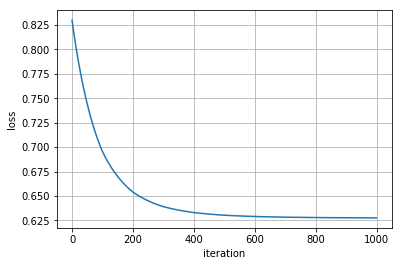

In [6]:
# set up w and b
# X shape of (50, 2)
# y shape of (50, 1)
# w shape of (2, 1)
# b shape of (50,1)
w = np.random.randn(2,1)
b = np.random.randn(50,1)

loss_hist = []
learning_rate = 1e-1
for _ in range(10):
    for i in range(100):
        # forward
        ty = np.dot(X, w) + b
        loss, dout = l2_loss(ty, y)
        loss_hist.append(loss)
        # backward
        dw = np.dot(X.T, dout)
        db = np.sum(dout, axis=0, keepdims=True)
        w -= learning_rate * dw
        b -= learning_rate * db
    learning_rate *= 0.88
    
plt.plot(loss_hist)
plt.grid()
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

## Visulized the train result


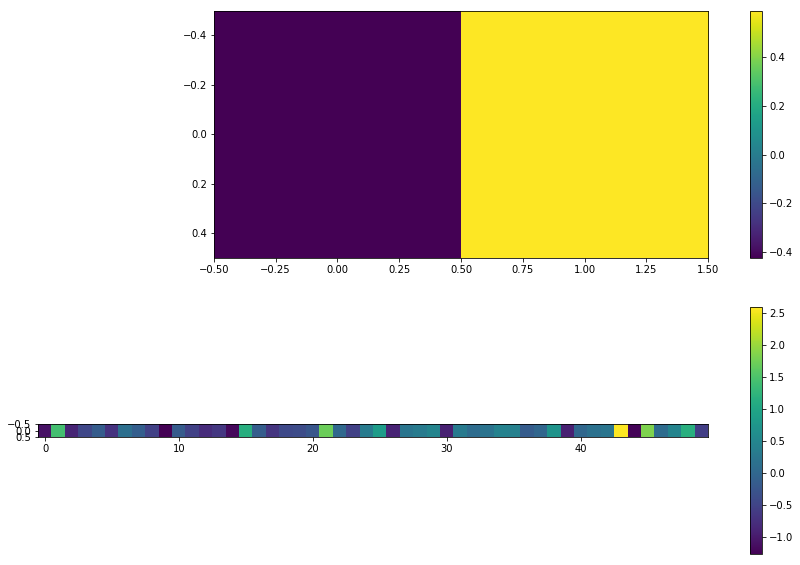

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.imshow(w.T)
plt.colorbar()
plt.subplot(2,1,2)
plt.imshow(b.T)
plt.colorbar()
plt.show()

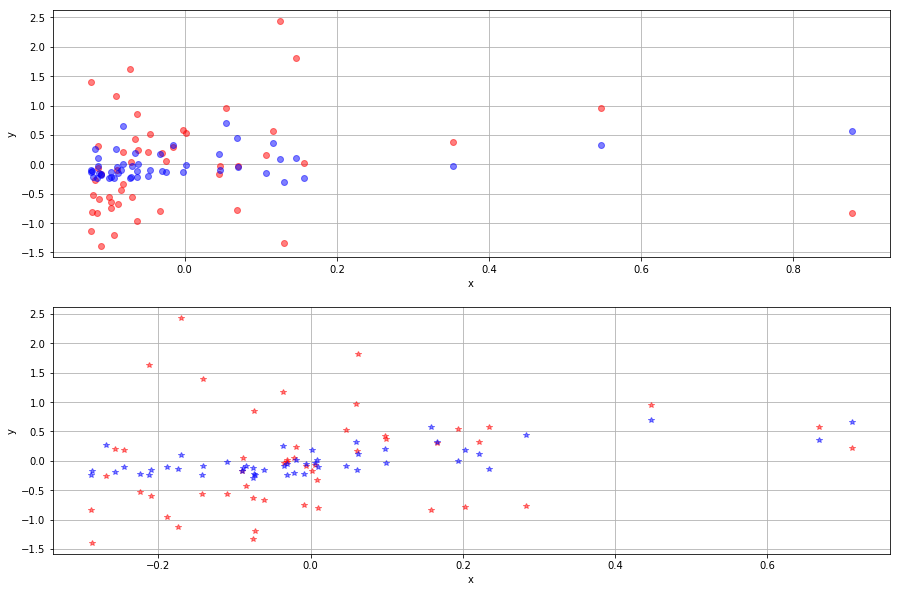

In [8]:
ty = np.dot(X, w) + b
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
plt.plot(X[:,0],ty, 'ro', alpha=0.5)
plt.plot(X[:,0],y, 'bo', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.subplot(2,1,2)
plt.plot(X[:,1],ty, 'r*', alpha=0.5)
plt.plot(X[:,1],y, 'b*', alpha=0.5)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

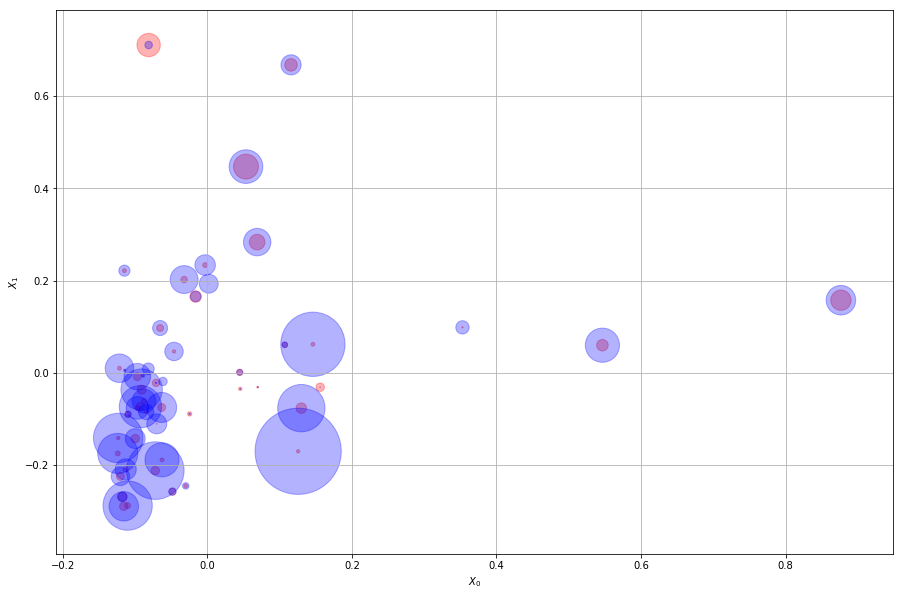

In [9]:
ty = np.dot(X, w) + b
plt.figure(figsize=(15,10))
colors = np.random.rand(ty.size)
tarea = np.pi * (20 * ty )**2  # 0 to 20 point radii
area = np.pi * (20 * y )**2
plt.scatter(X[:,0], X[:,1], s=area, c='r', alpha=0.3)
plt.scatter(X[:,0], X[:,1], s=tarea, c='b', alpha=0.3)
# plt.scatter(X[:,0], X[:,1], ty, alpha=0.5)
plt.xlabel("$X_0$")
plt.ylabel("$X_1$")
plt.grid()
plt.show()

## !!!The cell below doesn't make any sense!!!

## Try another way to get w and b

We know that if we use the L2 loss $$J = \dfrac{1}{m} \sum\limits_{i=1}^{m}(y_i - l_i)^2$$

The gradent of $J$ is $$\dfrac{d J}{d y_i} = \dfrac{2}{m}(y_i - l_i)$$

If we set $\dfrac{d J}{d x} = 0$, we can slove get the minimun $J$ in math.

According to the chain rule 
$$
\begin{align}
\dfrac{\partial J}{\partial \mathbf{w}} &= \dfrac{\partial J}{\partial \mathbf{y}} \dfrac{\partial \mathbf{y}}{\partial \mathbf{w}} \\
\dfrac{\partial J}{\partial \mathbf{b}} &= \dfrac{\partial J}{\partial \mathbf{y}} \dfrac{\partial \mathbf{y}}{\partial \mathbf{b}}
\end{align}
$$

$$\dfrac{\partial J}{\partial \mathbf{y}} = \dfrac{2}{m} (\mathbf{y} - \mathbf{l})$$

$$ \dfrac{\partial \mathbf{y}}{\partial \mathbf{w}} = X^T  ~~~~ \dfrac{\partial \mathbf{y}}{\partial \mathbf{b}} = 1  $$

Therefore

$$
\begin{align}
\dfrac{\partial J}{\partial \mathbf{b}} &= \dfrac{2}{m} (\mathbf{y} - \mathbf{l}) 
= \dfrac{2}{m} (X \mathbf{w} + \mathbf{b} - \mathbf{l}) = 0 \\
&\Rightarrow
X \mathbf{w} + \mathbf{b} - \mathbf{l} = 0 \\
&\Rightarrow
\mathbf{b} = \mathbf{l} - X \mathbf{w}
\end{align}
$$

$$
\begin{align}
\dfrac{\partial J}{\partial \mathbf{w}} &= \dfrac{2}{m} X^T (\mathbf{y} - \mathbf{l}) = \dfrac{2}{m} X^T (X \mathbf{w} + \mathbf{b} - \mathbf{l}) = 0 \\
&\Rightarrow
X^T X \mathbf{w} + X^T \mathbf{b} = X^T \mathbf{l} \\
&\Rightarrow
\mathbf{w} = (X^T X)^{-1} X^T ( \mathbf{l} - \mathbf{b} )
\end{align}
$$

Now we get
$$
\left\{
\begin{aligned}
\mathbf{b} &= \mathbf{l} - X \mathbf{w}\\
\mathbf{w} &= (X^T X)^{-1} X^T ( \mathbf{l} - \mathbf{b} )
\end{aligned}
\right.
$$

slove this, we get